In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.cluster import hierarchy 
import scipy.cluster.hierarchy
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import fcluster
import scipy.cluster.hierarchy
from scipy.spatial import distance_matrix 
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D 
import pylab
import pylab

In [3]:
source = pd.read_csv('insurance.csv')
df = source.drop(['smoker','children','sex','region'],axis=1)
df.head()


age     bmi      charges
0   19  27.900  16884.92400
1   18  33.770   1725.55230
2   28  33.000   4449.46200
3   33  22.705  21984.47061
4   32  28.880   3866.85520

In [4]:
x=df.values[:,:]
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx[:5]

array([[0.02173913, 0.3212268 , 0.25161076],
       [0.        , 0.47914985, 0.00963595],
       [0.2173913 , 0.45843422, 0.05311516],
       [0.32608696, 0.18146355, 0.33301003],
       [0.30434783, 0.34759214, 0.04381556]])

In [5]:
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])

for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i],feature_mtx[j])

0.6337491768370176

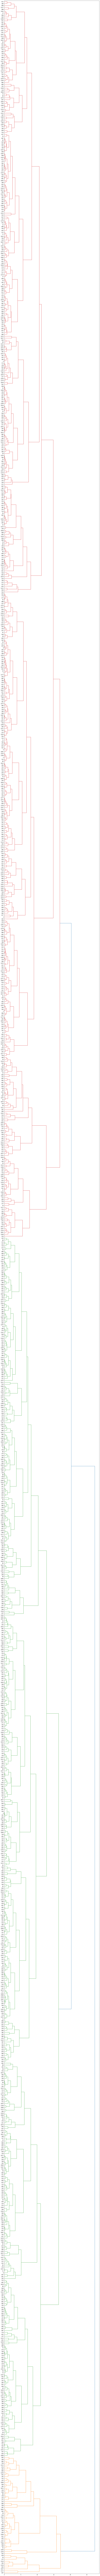

In [6]:
Z = hierarchy.linkage(D, 'complete')

from scipy.cluster.hierarchy import fcluster
max_d = 2
clusters = fcluster(Z, max_d, criterion='maxclust')
clusters

fig = pylab.figure(figsize=(18,500))
    
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

metrics.silhouette_score(df,clusters)

0.6931669968697278

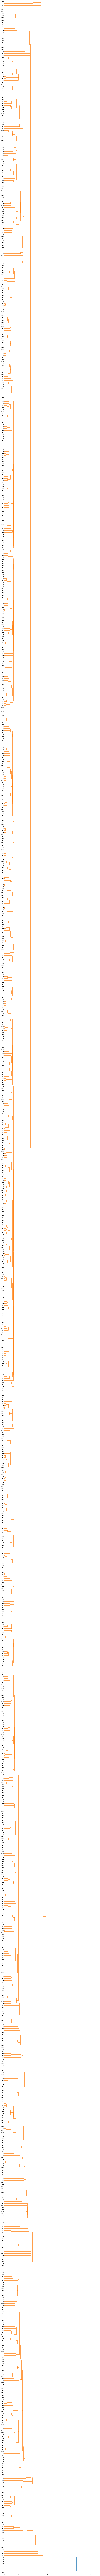

In [7]:
Z = hierarchy.linkage(D, 'single')

from scipy.cluster.hierarchy import fcluster
max_d = 2
clusters = fcluster(Z, max_d, criterion='maxclust')
clusters

fig = pylab.figure(figsize=(18,500))
    
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

metrics.silhouette_score(df,clusters)

0.3060081178657538

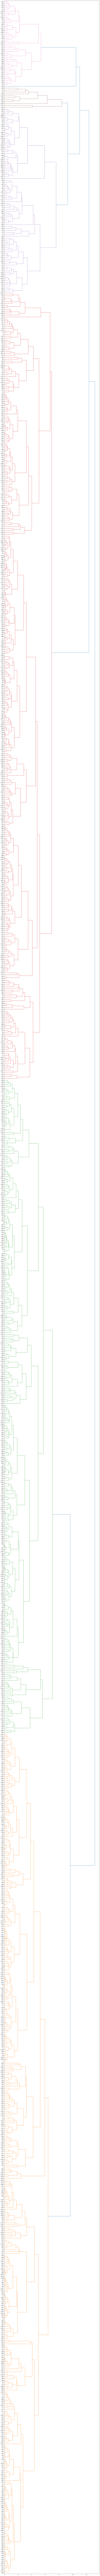

In [8]:
Z = hierarchy.linkage(D, 'average')

from scipy.cluster.hierarchy import fcluster
max_d = 2
clusters = fcluster(Z, max_d, criterion='maxclust')
clusters

fig = pylab.figure(figsize=(18,500))
    
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

metrics.silhouette_score(df,clusters)

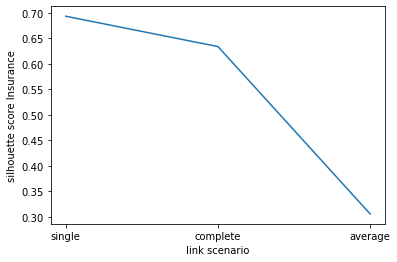

In [15]:
import matplotlib.pyplot as plt

silhouette_hierarchy = [0.6931669968697278,0.6337491768370176,
0.3060081178657538]
link_hierarchy = ['single','complete','average']

plt.plot(link_hierarchy,silhouette_hierarchy)
plt.xlabel('link scenario')
plt.ylabel('silhouette score Insurance')

plt.show()

In [10]:
# dist_matrix = distance_matrix(feature_mtx,feature_mtx)
# print (dist_matrix)

# agglom = AgglomerativeClustering(n_clusters=2,linkage='complete')
# agglom.fit(feature_mtx)
# agglom.labels_

In [11]:
# map_cluster = {0:'non-smoker',1:'smoker'}
# source['Hierarchial_label'] = [map_cluster[x] for x in agglom.labels_]
# source['eq'] = np.where(source['Hierarchial_label'] == source["smoker"],True,False)
# source['Cluster']  = agglom.labels_
# source

In [12]:
# import matplotlib.cm as cm
# import matplotlib.pyplot as plt

# plt.figure(figsize=(16,14))

# n_clusters = max(agglom.labels_)+1
# colors = cm.rainbow(np.linspace(0, 1, n_clusters))
# cluster_labels = list(range(0, n_clusters))

# # Create a figure of size 6 inches by 4 inches.
# plt.figure(figsize=(16,14))

# for color, label in zip(colors, cluster_labels):
#     subset = source[source.Cluster == label]
#     plt.scatter(subset.bmi, subset.charges, c=color, label='cluster'+str(label),alpha=0.5)


# plt.legend()
# plt.title('Clusters')
# plt.xlabel('bmi')
# plt.ylabel('charges')

In [13]:
# x

In [14]:
# fig = plt.figure(1, figsize=(8, 6))
# plt.clf()
# ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

# plt.legend
# plt.cla()
# ax.set_xlabel('age')
# ax.set_ylabel('bmi')
# ax.set_zlabel('charge')

# ax.scatter(x[:, 0], x[:, 1], x[:, 2], c= agglom.labels_.astype(np.float))